In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [164]:
!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: C:\Users\Keerti Joshi\Documents\GitHub\MLOPS_scaler\insurance.csv

  0%|          | 0.00/30.8k [00:00<?, ?B/s]
100%|##########| 30.8k/30.8k [00:00<00:00, 71.8kB/s]
100%|##########| 30.8k/30.8k [00:00<00:00, 71.8kB/s]


In [165]:
df = pd.read_csv('insurance.csv')

In [166]:
dataset = df.copy()

In [167]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [169]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [170]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
df['Diabetes'] = df['Diabetes'].astype('object')
df['AnyTransplants'] = df['AnyTransplants'].astype('object')
df['BloodPressureProblems'] = df['BloodPressureProblems'].astype('object')
df['AnyChronicDiseases'] = df['AnyChronicDiseases'].astype('object')
df['KnownAllergies'] = df['KnownAllergies'].astype('object')
df['HistoryOfCancerInFamily'] = df['HistoryOfCancerInFamily'].astype('object')

In [173]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,986.0,NaN,NaN,NaN,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,2.0,0.0,572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPressureProblems,986.0,2.0,0.0,524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnyTransplants,986.0,2.0,0.0,931.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnyChronicDiseases,986.0,2.0,0.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,986.0,NaN,NaN,NaN,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,NaN,NaN,NaN,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,2.0,0.0,774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HistoryOfCancerInFamily,986.0,2.0,0.0,870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfMajorSurgeries,986.0,NaN,NaN,NaN,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [174]:
df['BMI'] = round(df['Weight']/ ((df['Height'] / 100 )**2),2)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.73
1,60,1,0,0,0,180,73,0,0,0,29000,22.53
2,36,1,1,0,0,158,59,0,0,1,23000,23.63
3,52,1,1,0,1,183,93,0,0,2,28000,27.77
4,38,0,0,0,1,166,88,0,0,1,23000,31.93


In [175]:
df['BMI'].describe().T

count    986.000000
mean      27.460639
std        5.878789
min       15.160000
25%       23.395000
50%       27.155000
75%       30.760000
max       50.000000
Name: BMI, dtype: float64

In [176]:
df.isna().sum().sum()

np.int64(0)

In [177]:
def bmi_category(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif 18.5 <= bmi < 24.9:
    return 'Normal weight'
  elif 24.9 <= bmi <= 29.9:
    return 'Overweight'
  elif 29.9 < bmi <= 34.9:
    return 'Obese class I'
  elif 34.9 < bmi <= 39.9:
    return 'Obese class II'
  elif bmi > 39.9:
      return 'Obese class III'

def age_category(age):
  if age <= 10:
    return '10 & below'
  elif 11 <= age <= 20:
    return '11-20'
  elif 21 <= age <= 30:
    return '21-30'
  elif 31 <= age <= 40:
    return '31-40'
  elif 41 <= age <= 50:
    return '41-50'
  elif 51 <= age <= 60:
    return '51-60'
  elif age > 60:
    return '60 & above'

In [178]:
df['bmi_category'] = df['BMI'].apply(bmi_category)
df['age_category'] = df['Age'].apply(age_category)

In [179]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,bmi_category,age_category
0,45,0,0,0,0,155,57,0,0,0,25000,23.73,Normal weight,41-50
1,60,1,0,0,0,180,73,0,0,0,29000,22.53,Normal weight,51-60
2,36,1,1,0,0,158,59,0,0,1,23000,23.63,Normal weight,31-40
3,52,1,1,0,1,183,93,0,0,2,28000,27.77,Overweight,51-60
4,38,0,0,0,1,166,88,0,0,1,23000,31.93,Obese class I,31-40


In [180]:
df['bmi_category'].value_counts()

bmi_category
Overweight         322
Normal weight      316
Obese class I      207
Obese class II      67
Underweight         38
Obese class III     36
Name: count, dtype: int64

<h3>Univariate Analysis</h3>

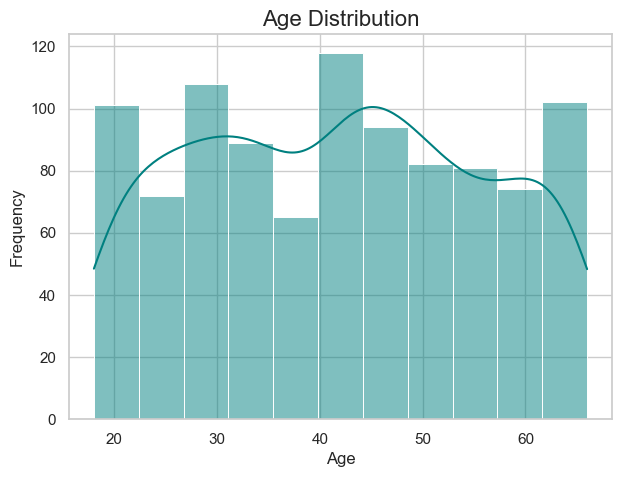

In [181]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['Age'], kde=True, color='teal', linewidth=0.7)

# Set a title and axis labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.grid(True)

# Show the plot
plt.show()

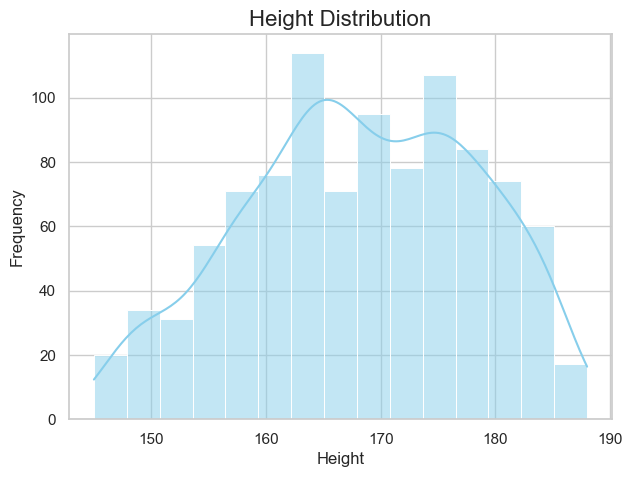

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['Height'], kde=True, color='skyblue', linewidth=0.7)

# Set a title and axis labels
plt.title('Height Distribution', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

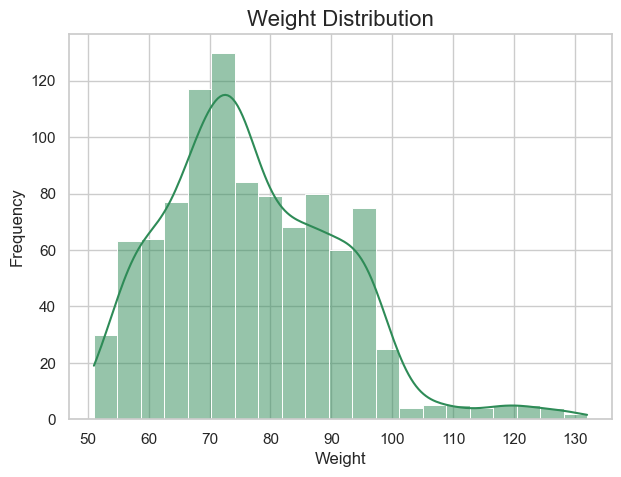

In [182]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['Weight'], kde=True, color='seagreen', linewidth=0.7)

# Set a title and axis labels
plt.title('Weight Distribution', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

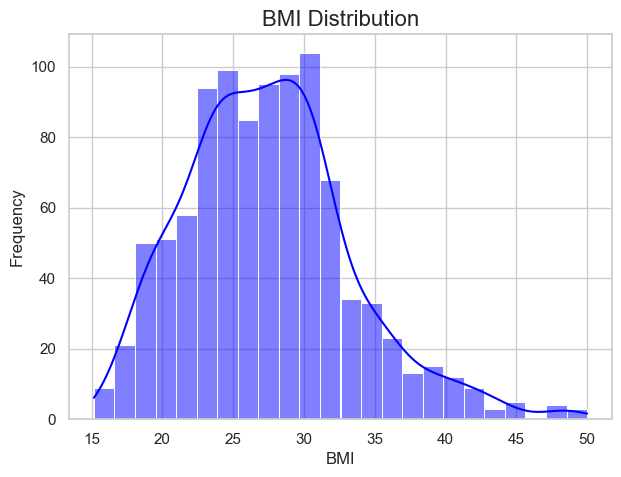

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['BMI'], kde=True, color='blue', linewidth=0.7)

# Set a title and axis labels
plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

<h3>Target variable - Premium Price Distribution</h3>

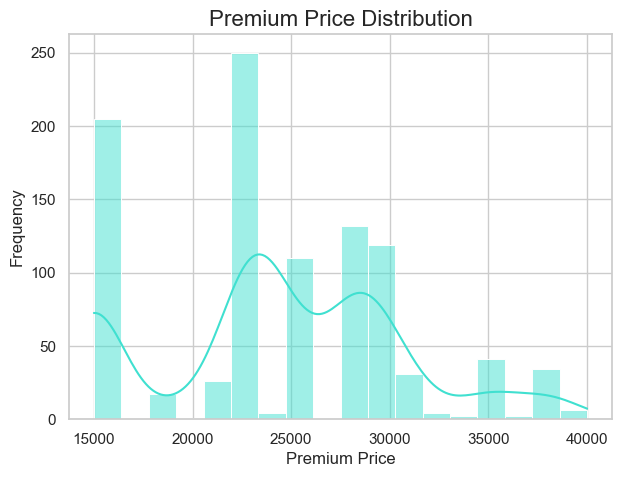

In [183]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# Plot the distribution with KDE and histogram
sns.histplot(df['PremiumPrice'], kde=True, color='turquoise', linewidth=0.7)

# Set a title and axis labels
plt.title('Premium Price Distribution', fontsize=16)
plt.xlabel('Premium Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.show()

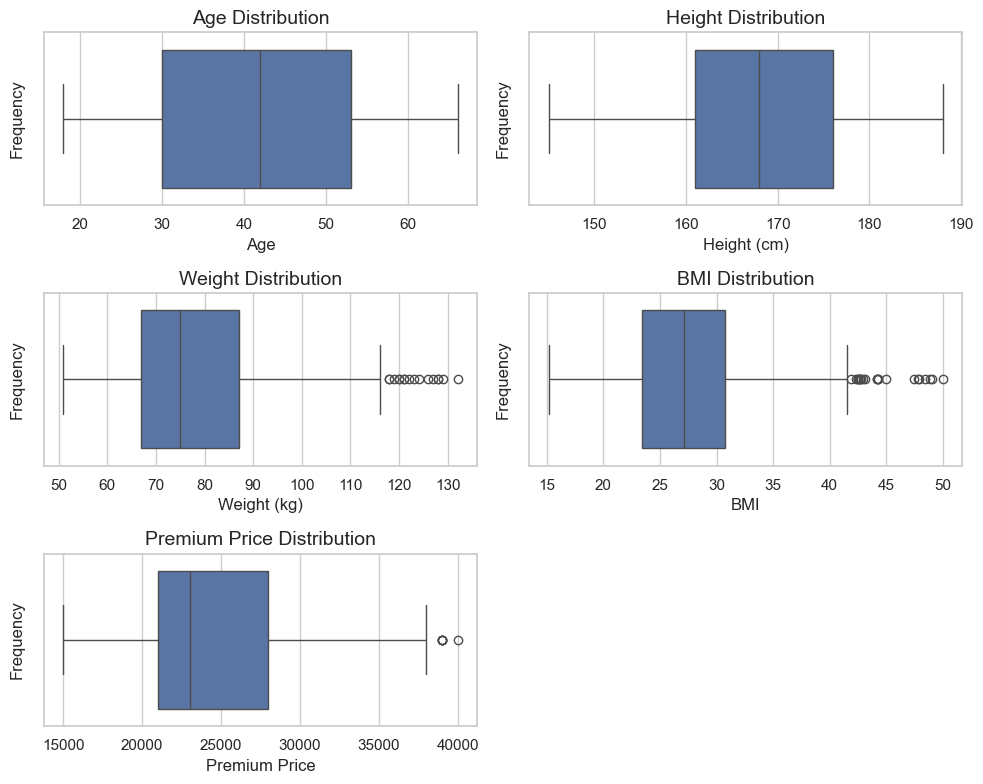

In [184]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
sns.set_palette("muted")

# Age Distribution Boxplot
sns.boxplot(data=df, x='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Height Distribution Boxplot
sns.boxplot(data=df, x='Height', ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution', fontsize=14)
axes[0, 1].set_xlabel('Height (cm)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Weight Distribution Boxplot
sns.boxplot(data=df, x='Weight', ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution', fontsize=14)
axes[1, 0].set_xlabel('Weight (kg)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Weight Distribution Boxplot
sns.boxplot(data=df, x='BMI', ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution', fontsize=14)
axes[1, 1].set_xlabel('BMI', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Premium Price Distribution Boxplot
sns.boxplot(data=df, x='PremiumPrice', ax=axes[2, 0])
axes[2, 0].set_title('Premium Price Distribution', fontsize=14)
axes[2, 0].set_xlabel('Premium Price', fontsize=12)
axes[2, 0].set_ylabel('Frequency', fontsize=12)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

Data Distribution analysis with respect to several Health Conditions


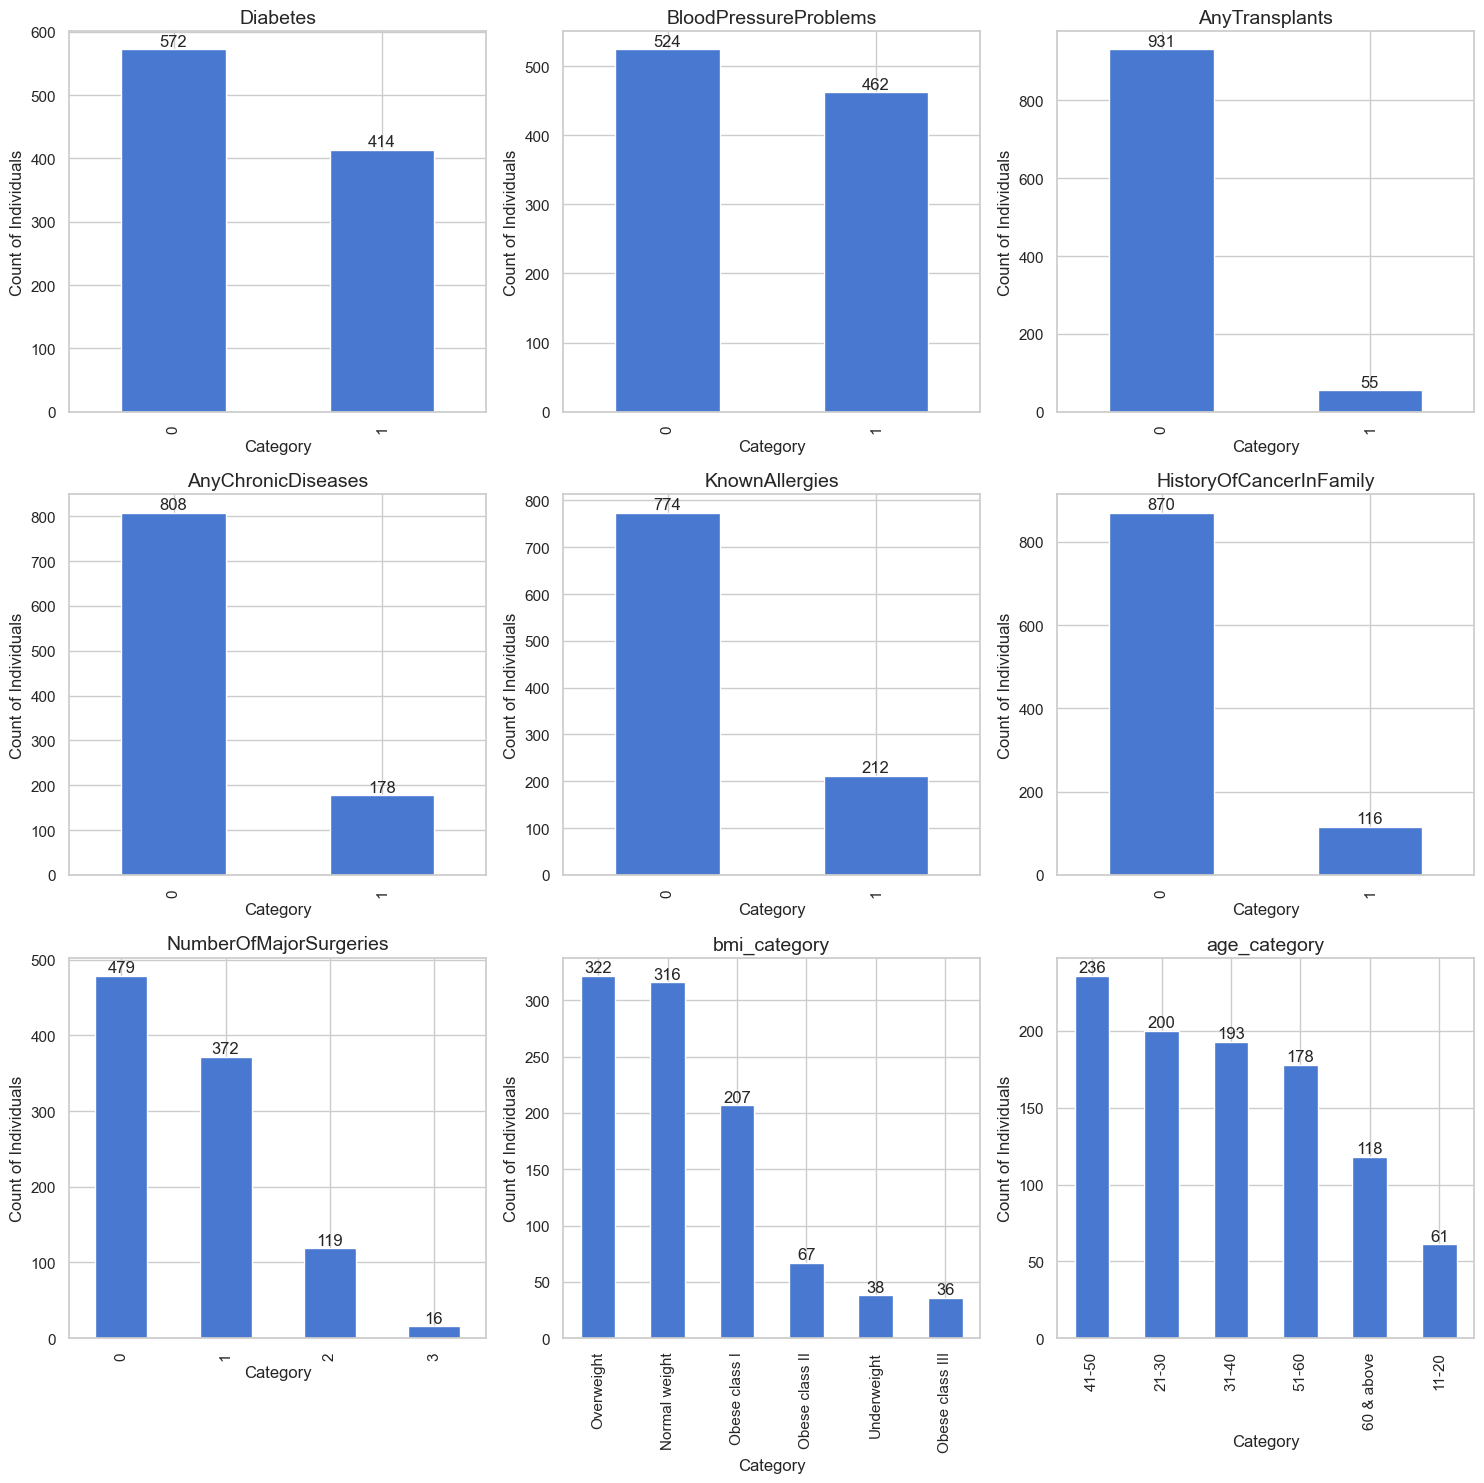

In [38]:
cat_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'bmi_category', 'age_category']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Data distribution analysis
print('Data Distribution analysis with respect to several Health Conditions')

for i, cat in enumerate(cat_features):
    # Get the subplot's row and column index
    row, col = divmod(i, 3)
    
    # Sort data and get counts
    df_cat = df.sort_values(by=[cat])
    counts = df_cat[cat].value_counts()

    # Create the bar plot on the corresponding axis
    ax = axes[row, col]
    counts.plot(kind='bar', ax=ax)
    ax.set_title(cat, fontsize=14)
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Count of Individuals', fontsize=12)

    # Add count labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, str(int(height)), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

In [185]:
#Grouping Premium price distribution by BMI category and Age category.

PremiumbyBMI = df.groupby(['bmi_category'])['PremiumPrice'].mean()
PremiumbyAge = df.groupby(['age_category'])['PremiumPrice'].mean()

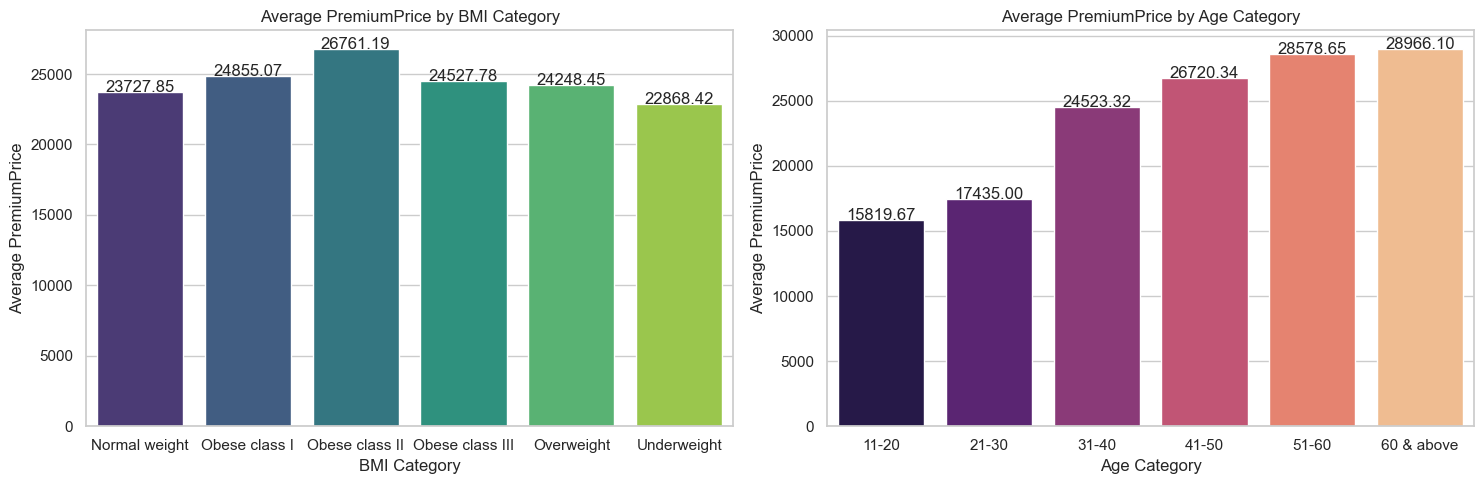

In [186]:
plt.figure(figsize=(15, 5))

# Plot PremiumPrice by bmi_category
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=PremiumbyBMI.index, y=PremiumbyBMI.values, palette='viridis')
plt.title('Average PremiumPrice by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average PremiumPrice')

# Add value annotations on top of bars for BMI categories
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, f'{p.get_height():.2f}', ha='center')

# Plot PremiumPrice by age_category
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=PremiumbyAge.index, y=PremiumbyAge.values, palette='magma')
plt.title('Average PremiumPrice by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average PremiumPrice')

# Add value annotations on top of bars for Age categories
for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, f'{p.get_height():.2f}', ha='center')

plt.tight_layout()

# Show plot
plt.show()

In [187]:
#Grouping Premium price distribution by 'Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases',
#'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries' for EDA

Premiumbydiabetes = df.groupby(['Diabetes'])['PremiumPrice'].mean()
Premiumbybpproblem = df.groupby(['BloodPressureProblems'])['PremiumPrice'].mean()
Premiumbydiabetes = df.groupby(['Diabetes'])['PremiumPrice'].mean()
Premiumbybpproblem = df.groupby(['BloodPressureProblems'])['PremiumPrice'].mean()
Premiumbyanytrans = df.groupby(['AnyTransplants'])['PremiumPrice'].mean()
Premiumbyanychronic = df.groupby(['AnyChronicDiseases'])['PremiumPrice'].mean()
Premiumbyknownallergies = df.groupby(['KnownAllergies'])['PremiumPrice'].mean()
Premiumbyfamcancerhistory = df.groupby(['HistoryOfCancerInFamily'])['PremiumPrice'].mean()
Premiumbysurgeries = df.groupby(['NumberOfMajorSurgeries'])['PremiumPrice'].mean()

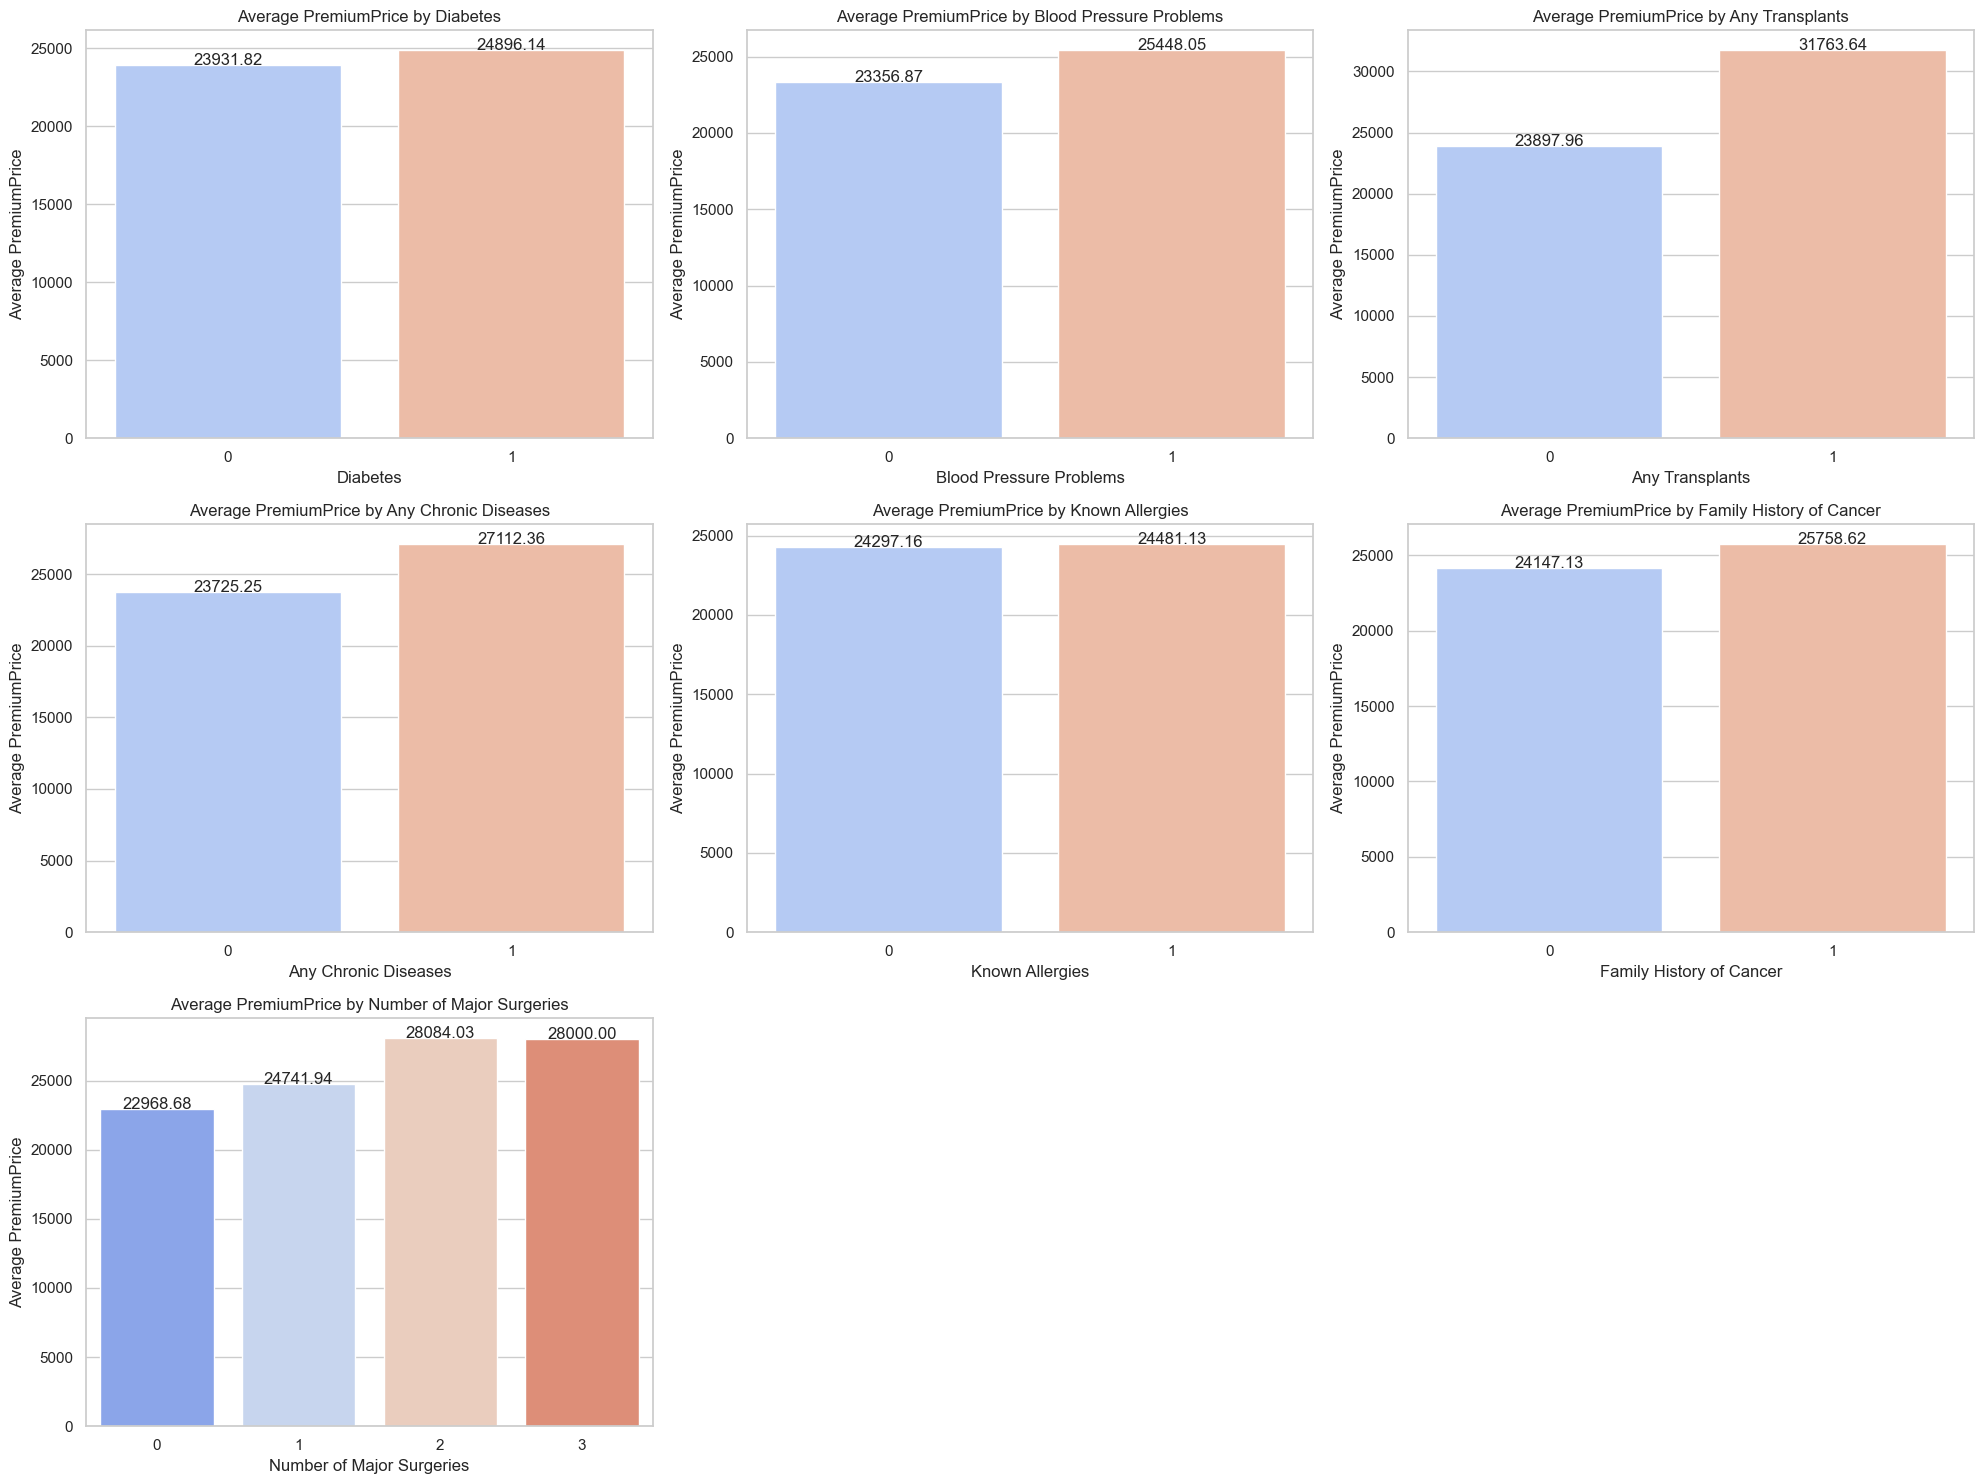

In [188]:
plt.figure(figsize=(20, 15))

# Define the categories and their corresponding groupings
groupings = {
    'Diabetes': Premiumbydiabetes,
    'Blood Pressure Problems': Premiumbybpproblem,
    'Any Transplants': Premiumbyanytrans,
    'Any Chronic Diseases': Premiumbyanychronic,
    'Known Allergies': Premiumbyknownallergies,
    'Family History of Cancer': Premiumbyfamcancerhistory,
    'Number of Major Surgeries': Premiumbysurgeries
}

# Loop through the groupings and plot each one
for i, (category, premium_data) in enumerate(groupings.items(), 1):
    plt.subplot(3, 3, i)

    # Create the bar plot
    ax = sns.barplot(x=premium_data.index, y=premium_data.values, palette='coolwarm')
    plt.title(f'Average PremiumPrice by {category}')
    plt.xlabel(category)
    plt.ylabel('Average PremiumPrice')

    # Add value annotations on top of the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.5, f'{p.get_height():.2f}', ha='center')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

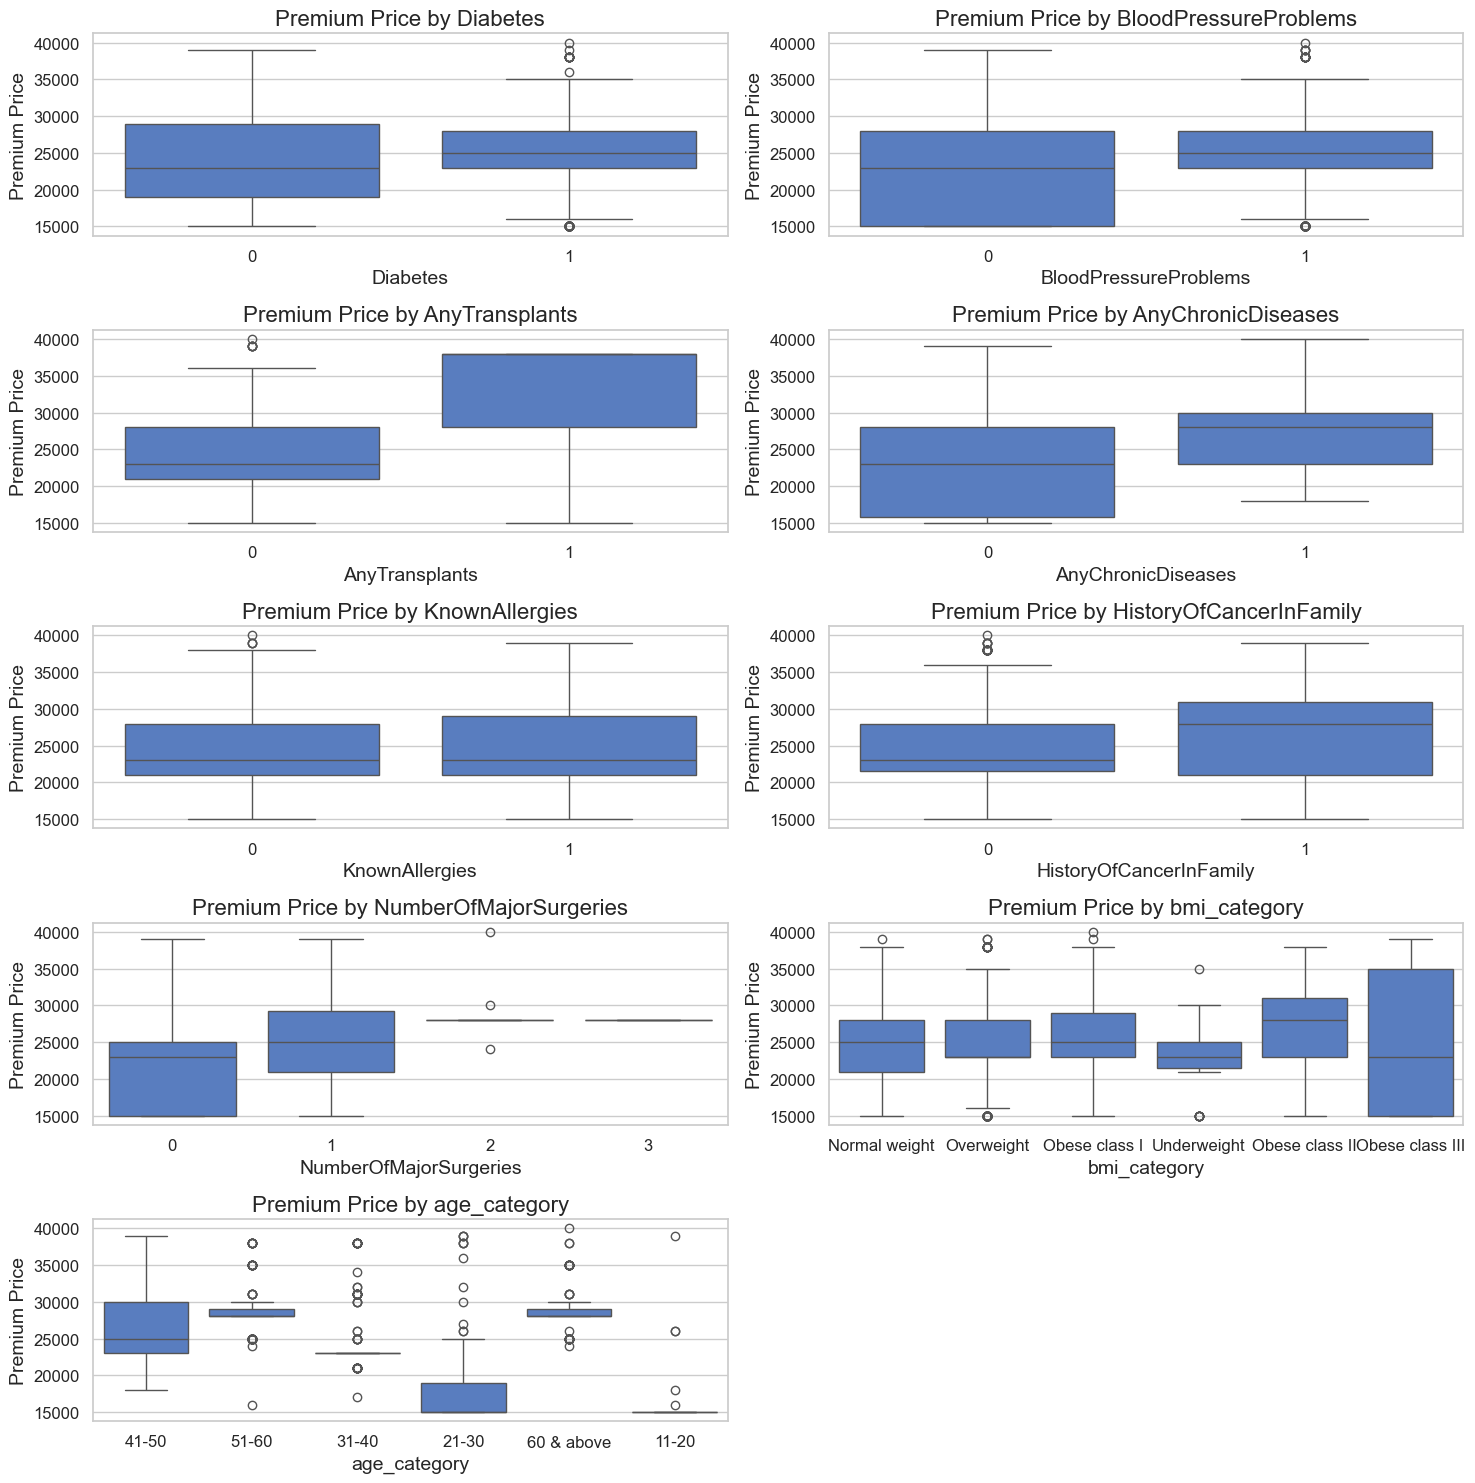

In [48]:
fig, axes = plt.subplots(5, 2, figsize=(15, 15)) 
axes = axes.flatten()
sns.set_palette("muted")

# Loop over columns to create boxplots
for i, column in enumerate(cat_features):
    ax = sns.boxplot(data=df, x=column, y="PremiumPrice", ax=axes[i])
    
    ax.set_title(f'Premium Price by {column}', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Premium Price', fontsize=14)   
    ax.tick_params(axis='both', which='major', labelsize=12)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

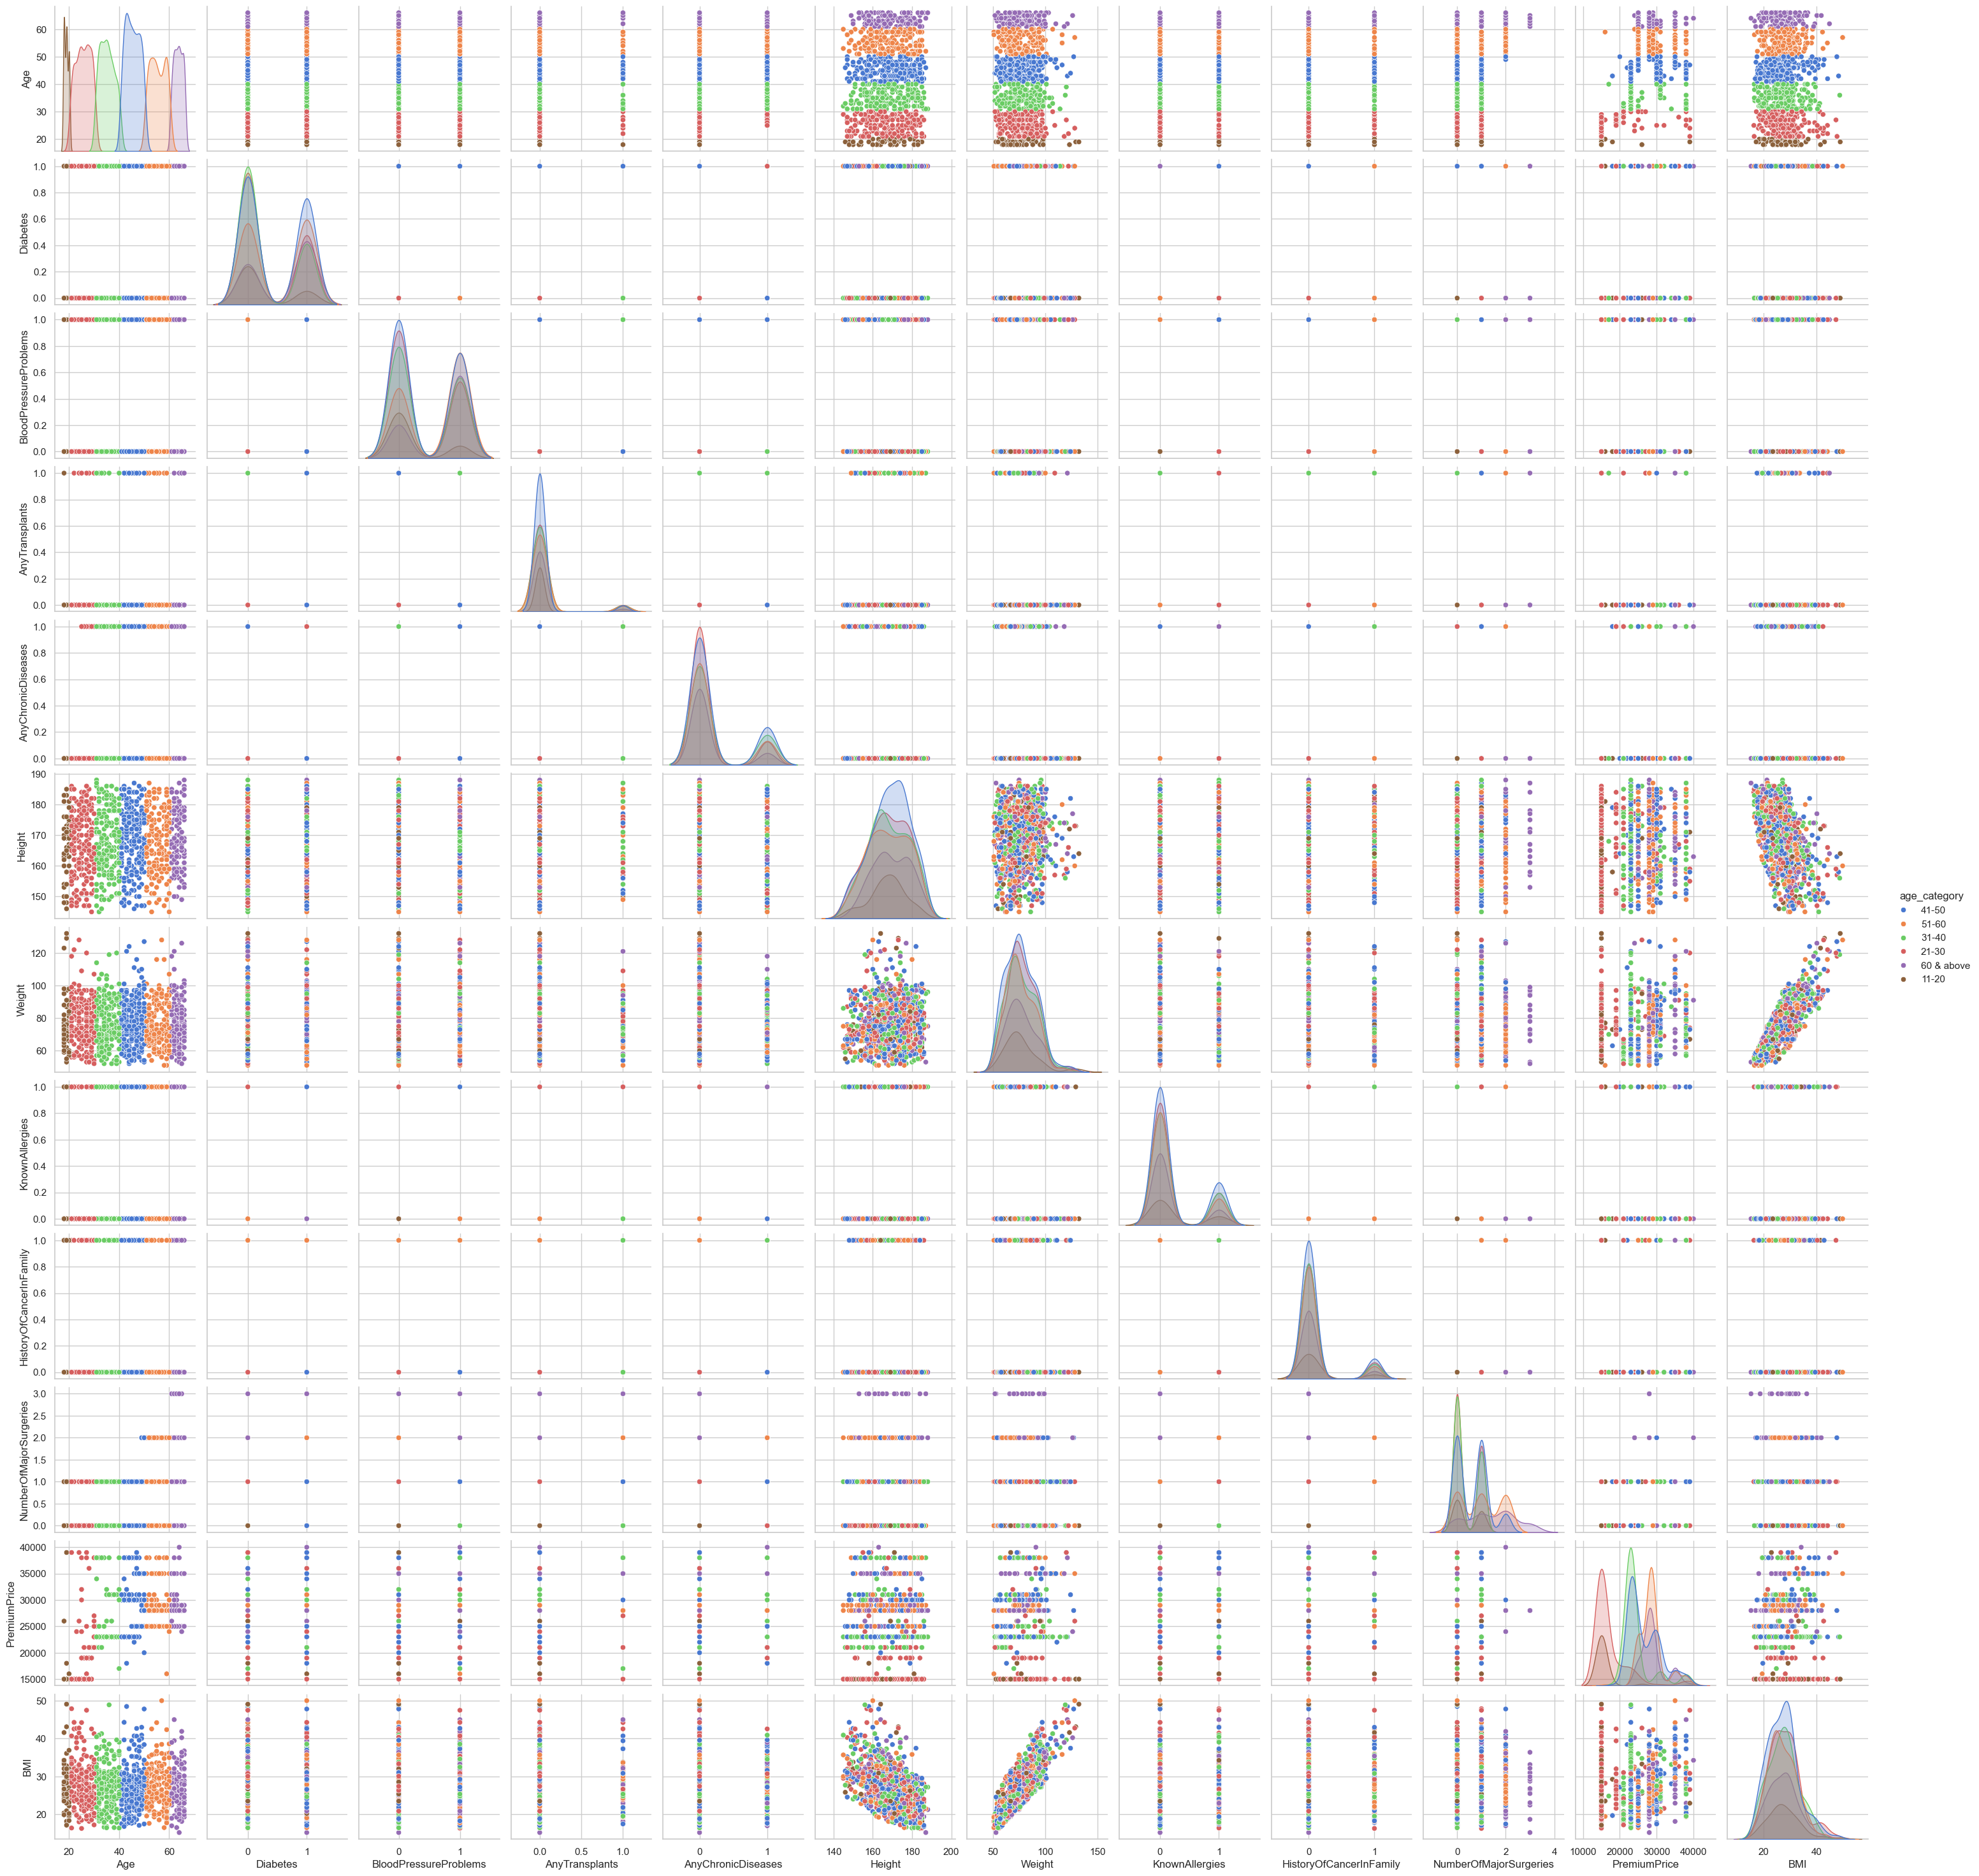

In [189]:
#Pairplots
sns.pairplot(df, hue='age_category')

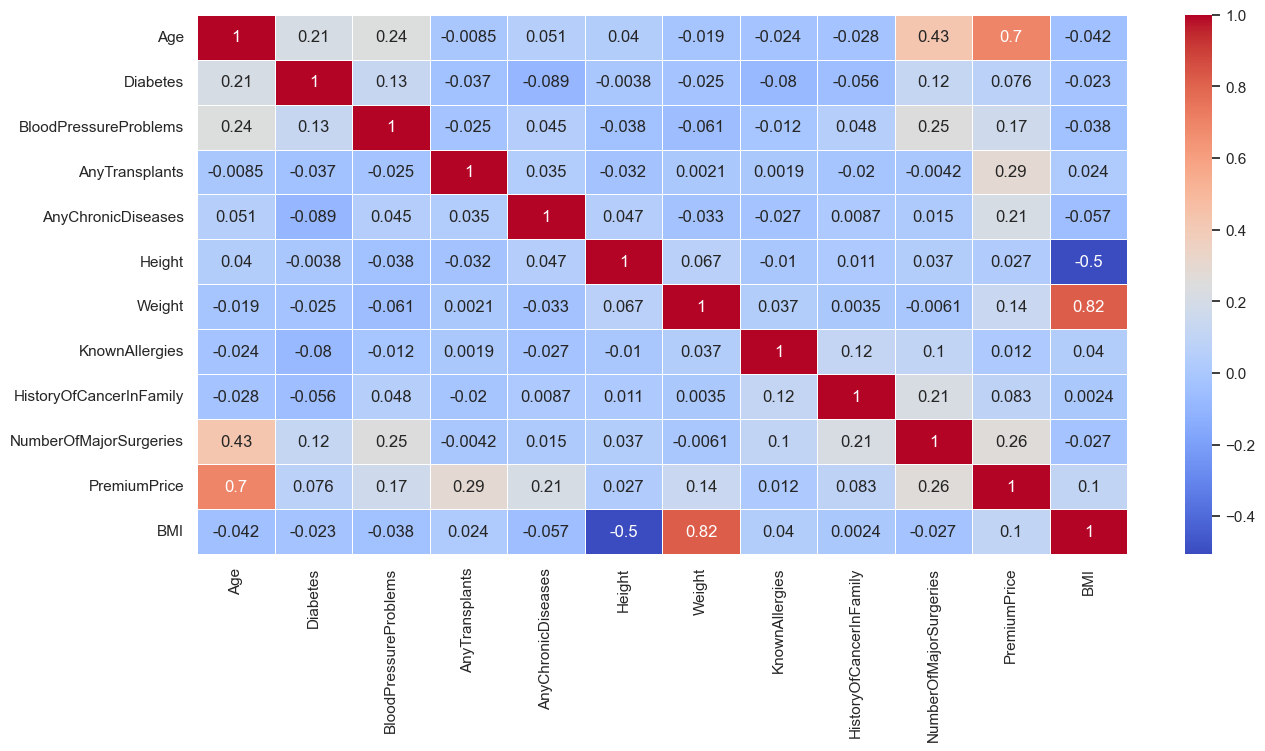

In [190]:
df_corr = df.drop(['bmi_category', 'age_category'], axis=1)

plt.figure(figsize=(15,7))
sns.heatmap(df_corr.corr(),annot=True, cmap = 'coolwarm', linewidth=.5)
plt.show()

<h2>Hypothesis Testing</h2>

<h3>T-Test</h3>

Null Hypothesis (H0): Health condition has no effect the Premium Price

Alternative Hypothesis (H1): Health condition affects the Premium Price

In [191]:
import scipy.stats as stats

def hypothesis_testing(df, conditions, target_variable='PremiumPrice', alpha=0.05):
    """
    Performs hypothesis testing (two-sample t-test) for each binary condition in the provided list.
    
    Parameters:
        df (DataFrame): The dataset containing the binary conditions and target variable.
        conditions (list): List of column names representing binary conditions.
        target_variable (str): The target variable to compare across the binary groups (default is 'PremiumPrice').
        alpha (float): Significance level for hypothesis testing (default is 0.05).
        
    Returns:
        results (dict): A dictionary containing the t-statistics, p-values, and conclusions for each condition.
    """
    results = {}
    
    for condition in conditions:
        # Extract the two groups based on the binary condition (1 and 0)
        group_1 = df[df[condition] == 1][target_variable]
        group_0 = df[df[condition] == 0][target_variable]
        
        # Perform two-sample t-test
        t_stat, p_value = stats.ttest_ind(group_1, group_0, equal_var=False)
        
        # Determine the conclusion based on the p-value and alpha
        if p_value < alpha:
            conclusion = f"Reject the null hypothesis: {condition} affects the {target_variable}."
        else:
            conclusion = f"Fail to reject the null hypothesis: No significant effect of {condition} on {target_variable}."
        
        # Store the results
        results[condition] = {
            'T-statistic': t_stat,
            'P-value': p_value,
            'Conclusion': conclusion
        }
        
    return results


conditions_to_test = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                      'KnownAllergies', 'HistoryOfCancerInFamily']

test_results = hypothesis_testing(df, conditions_to_test)

# Display results
for condition, result in test_results.items():
    print(f"\nResults for {condition}:")
    print(f"T-statistic: {result['T-statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Conclusion: {result['Conclusion']}")
    print('----'*30)



Results for Diabetes:
T-statistic: 2.4489285982890396
P-value: 0.014508142994631809
Conclusion: Reject the null hypothesis: Diabetes affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for BloodPressureProblems:
T-statistic: 5.370281271166068
P-value: 9.813498313247295e-08
Conclusion: Reject the null hypothesis: BloodPressureProblems affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for AnyTransplants:
T-statistic: 6.2599390386040215
P-value: 5.544902737541748e-08
Conclusion: Reject the null hypothesis: AnyTransplants affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for AnyChronicDiseases:
T-statistic: 7.707663368460665
P-value: 1.7279736467737666e-13
Conclusion: Reject the

<h3>ANOVA Test</h3>

In [192]:
import scipy.stats as stats

def anova_hypothesis_testing(df, categorical_columns, target_variable='PremiumPrice', alpha=0.05):
    """
    Performs One-Way ANOVA hypothesis testing for categorical feature with 3+ values in the provided list.
    
    Parameters:
        df (DataFrame): The dataset containing the categorical features and target variable.
        categorical_columns (list): List of categorical column names to test.
        target_variable (str): The target variable to compare across the categories (default is 'PremiumPrice').
        alpha (float): Significance level for hypothesis testing (default is 0.05).
        
    Returns:
        results (dict): A dictionary containing the F-statistics, p-values, and conclusions for each condition.
    """
    results = {}
    
    for column in categorical_columns:
        # Group the data by the categorical feature and extract the target variable values for each group
        groups = [df[df[column] == category][target_variable].values for category in df[column].unique()]
        
        # Perform One-Way ANOVA
        f_stat, p_value = stats.f_oneway(*groups)
        
        # Determine the conclusion based on the p-value and alpha
        if p_value < alpha:
            conclusion = f"Reject the null hypothesis: {column} affects the {target_variable}."
        else:
            conclusion = f"Fail to reject the null hypothesis: No significant effect of {column} on {target_variable}."
        
        # Store the results
        results[column] = {
            'F-statistic': f_stat,
            'P-value': p_value,
            'Conclusion': conclusion
        }
        
    return results

# Example usage:
categorical_columns_to_test = ['NumberOfMajorSurgeries', 'bmi_category', 'age_category'] 

# Call the function
anova_results = anova_hypothesis_testing(df, categorical_columns_to_test)

# Display results
for column, result in anova_results.items():
    print(f"\nResults for {column}:")
    print(f"F-statistic: {result['F-statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Conclusion: {result['Conclusion']}")
    print('----'*30)



Results for NumberOfMajorSurgeries:
F-statistic: 26.13539359740762
P-value: 2.8711631377228097e-16
Conclusion: Reject the null hypothesis: NumberOfMajorSurgeries affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for bmi_category:
F-statistic: 3.382368924763308
P-value: 0.004909184470670699
Conclusion: Reject the null hypothesis: bmi_category affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------

Results for age_category:
F-statistic: 236.58752890662143
P-value: 1.1233378593947144e-165
Conclusion: Reject the null hypothesis: age_category affects the PremiumPrice.
------------------------------------------------------------------------------------------------------------------------


<h3>Chi-Square Test</h3>

Null Hypothesis (H₀): There is no association between the two health conditions (e.g., presence of chronic disease and family history of cancer).

Alternative Hypothesis (H₁): There is an association between the two health conditions.

In [193]:
from scipy.stats import chi2_contingency

def chi_square_test(df, health_conditions, alpha=0.05):
    """
    Performs Chi-Square test of independence for all pairs of binary health conditions.
    
    Parameters:
        df (DataFrame): The dataset containing the health conditions.
        health_conditions (list): List of health condition column names (binary variables).
        alpha (float): Significance level for hypothesis testing (default is 0.05).
        
    Returns:
        results (dict): A dictionary containing Chi-Square statistics, p-values, and conclusions for each condition pair.
    """
    results = {}
    
    # Loop through all pairs of conditions
    for i in range(len(health_conditions)):
        for j in range(i + 1, len(health_conditions)):
            condition_1 = health_conditions[i]
            condition_2 = health_conditions[j]
            
            contingency_table = pd.crosstab(df[condition_1], df[condition_2])
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            
            if p_value < alpha:
                conclusion = f"Reject the null hypothesis: There is an association between {condition_1} and {condition_2}."
            else:
                conclusion = f"Fail to reject the null hypothesis: No significant association between {condition_1} and {condition_2}."
            
            results[(condition_1, condition_2)] = {
                'Chi-square statistic': chi2_stat,
                'P-value': p_value,
                'Degrees of freedom': dof,
                'Expected frequencies': expected,
                'Conclusion': conclusion
            }
    
    return results

health_conditions_to_test = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 
                             'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'bmi_category', 'age_category']

# Call the function
chi_square_results = chi_square_test(df, health_conditions_to_test)

# Display results
for (condition_1, condition_2), result in chi_square_results.items():
    print(f"\nResults for {condition_1} and {condition_2}:")
    print(f"Chi-square statistic: {result['Chi-square statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Degrees of freedom: {result['Degrees of freedom']}")
    print(f"Expected frequencies: \n{result['Expected frequencies']}")
    print(f"Conclusion: {result['Conclusion']}")
    print('---'*45)



Results for Diabetes and BloodPressureProblems:
Chi-square statistic: 15.571225392078397
P-value: 7.945461025980538e-05
Degrees of freedom: 1
Expected frequencies: 
[[303.98377282 268.01622718]
 [220.01622718 193.98377282]]
Conclusion: Reject the null hypothesis: There is an association between Diabetes and BloodPressureProblems.
---------------------------------------------------------------------------------------------------------------------------------------

Results for Diabetes and AnyTransplants:
Chi-square statistic: 1.0207290599382488
P-value: 0.3123461364949182
Degrees of freedom: 1
Expected frequencies: 
[[540.09330629  31.90669371]
 [390.90669371  23.09330629]]
Conclusion: Fail to reject the null hypothesis: No significant association between Diabetes and AnyTransplants.
---------------------------------------------------------------------------------------------------------------------------------------

Results for Diabetes and AnyChronicDiseases:
Chi-square statistic: 

<h4>Outlier Detection and Handling</h4>

In [194]:
numcols = ['Age', 'Height', 'Weight', 'BMI', 'PremiumPrice']

def iqr_outlier_detection(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]


outliers_info = []

for column in numcols:
    outlier_count = iqr_outlier_detection(df, column)
    outliers_info.append({
        'Column': column,
        'Outliers_IQR': outlier_count
    })

outliers_info_df = pd.DataFrame(outliers_info)

print("Number of outliers using IQR method:")
print(outliers_info_df)

Number of outliers using IQR method:
         Column  Outliers_IQR
0           Age             0
1        Height             0
2        Weight            16
3           BMI            22
4  PremiumPrice             6


In [195]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'bmi_category', 'age_category'],
      dtype='object')

In [196]:
data = df.copy()

In [197]:
print(data.isna().sum().sum())

0


Dropping BMI, BMIcategory since we have Height and Weight features which are correlated. Dropping AgeCategory as we have Age feature. Dropping KnownAllergies Category since it does no have any affect on Premium Price (Target Variable)

In [198]:
data.drop(['BMI', 'bmi_category', 'age_category', 'KnownAllergies'], axis=1,inplace=True)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   HistoryOfCancerInFamily  986 non-null    object
 8   NumberOfMajorSurgeries   986 non-null    int64 
 9   PremiumPrice             986 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.2+ KB


In [200]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

def performance_metrics(y_true, y_pred, d, metrics=['R2', 'Adjusted R2', 'MSE', 'RMSE', 'MAPE']):
    """
    Calculate and return various performance metrics for regression models.
    Parameters:
        y_true: True values, y_pred: Predicted values.
        d (int): The number of features in the model (for adjusted R²).
        metrics (list): List of metrics to compute. Defaults to ['R2', 'Adjusted R2', 'MSE', 'RMSE', 'MAPE'].
    Returns:
        dict: A dictionary containing the computed performance metrics.
    """
    performance = {}

    # Calculate R²
    if 'R2' in metrics:
        r2 = r2_score(y_true, y_pred)
        performance["R2"] = float(round(r2, 2))
    
    # Calculate Adjusted R²
    if 'Adjusted R2' in metrics:
        r2 = r2_score(y_true, y_pred)
        n = len(y_true)
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - d - 1)
        performance["Adjusted R2"] = float(round(adj_r2, 2))

    # Calculate MSE
    if 'MSE' in metrics:
        mse = mean_squared_error(y_true, y_pred)
        performance["Mean Squared Error"] = float(round(mse, 2))

    # Calculate RMSE
    if 'RMSE' in metrics:
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        performance["Root Mean Squared Error"] = float(round(rmse, 2))

    # Calculate MAPE
    if 'MAPE' in metrics:
        mape = mean_absolute_percentage_error(y_true, y_pred)
        performance["Mean Absolute Percentage Error"] = float(round(mape, 2))

    return performance


<h4>Separating the Target Variable and Independant Features</h4>

In [202]:
dataset.drop(['KnownAllergies'], axis=1, inplace=True)
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,25000
1,60,1,0,0,0,180,73,0,0,29000
2,36,1,1,0,0,158,59,0,1,23000
3,52,1,1,0,1,183,93,0,2,28000
4,38,0,0,0,1,166,88,0,1,23000


In [221]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   HistoryOfCancerInFamily  986 non-null    int64
 8   NumberOfMajorSurgeries   986 non-null    int64
 9   PremiumPrice             986 non-null    int64
dtypes: int64(10)
memory usage: 77.2 KB


In [203]:
Y = dataset['PremiumPrice']
X = dataset.drop(['PremiumPrice'],axis=1)

X.shape, Y.shape

((986, 9), (986,))

In [204]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0
1,60,1,0,0,0,180,73,0,0
2,36,1,1,0,0,158,59,0,1
3,52,1,1,0,1,183,93,0,2
4,38,0,0,0,1,166,88,0,1


In [205]:
Y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

Train-Test Split

In [206]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99)

In [207]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((788, 9), (198, 9), (788,), (198,))

Scaling the features

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
scaler = StandardScaler()

In [210]:
# Fit the scaler on the training data and transform the training set
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the already fitted scaler
x_test_scaled = scaler.transform(x_test)

In [211]:
import pickle

with open('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)

<h3>Model Creation</h3>

In [213]:
#importing mlflow
#!pip install mlflow

import mlflow

<h4>Linear Regression</h4>

In [214]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [215]:
models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], 
          ['Ridge Regression :', Ridge(alpha=1.0)] 
          ]

In [216]:
for name,model in models:
    model.fit(x_train_scaled, y_train.values)
    predictions = model.predict(x_test_scaled)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print('Coefficients: ', model.coef_)
    print("Training score", model.score(x_train_scaled, y_train))
    print("Testing Score", model.score(x_test_scaled, y_test))
    print('---'*45)

Linear Regression : 3851.0369352742905
Coefficients:  [4667.30435931 -199.20550865   89.97640502 1755.02992603  935.36051078
  -19.66629047 1034.36797202  854.4350187  -510.14078095]
Training score 0.6491607645357585
Testing Score 0.6084656916704365
---------------------------------------------------------------------------------------------------------------------------------------
Lasso Regression : 3851.0366650241613
Coefficients:  [4667.10466467 -199.09707922   89.8566602  1754.92965263  935.27594721
  -19.55364733 1034.24710624  854.30117767 -509.91341937]
Training score 0.6491607614806505
Testing Score 0.6084657466230092
---------------------------------------------------------------------------------------------------------------------------------------
Ridge Regression : 3850.678310253836
Coefficients:  [4659.13064372 -198.18761097   90.46947849 1752.87483748  934.59104534
  -19.05051168 1032.74214374  852.44367026 -505.81323791]
Training score 0.6491592026168835
Testing Score 

In [222]:
lrmodel = LinearRegression()
lrmodel.fit(x_train_scaled, y_train)

LinearRegression()

In [223]:
print("Linear Regression Model Performance on Training Data -->")
performance_metrics(y_train, lrmodel.predict(x_train_scaled), x_train_scaled.shape[1])

Linear Regression Model Performance on Training Data -->


{'R2': 0.65,
 'Adjusted R2': 0.65,
 'Mean Squared Error': 13771841.22,
 'Root Mean Squared Error': 3711.04,
 'Mean Absolute Percentage Error': 0.11}

In [224]:
print("Linear Regression Model Performance on Test Data -->")
performance_metrics(y_test, lrmodel.predict(x_test_scaled), x_test_scaled.shape[1])

Linear Regression Model Performance on Test Data -->


{'R2': 0.61,
 'Adjusted R2': 0.59,
 'Mean Squared Error': 14830485.48,
 'Root Mean Squared Error': 3851.04,
 'Mean Absolute Percentage Error': 0.11}

<h4>Polynomial Features modeling</h4>

In [225]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
linreg_poly = LinearRegression()
linreg_poly.fit(x_train_poly, y_train)


LinearRegression()

In [226]:
print("Polynomial Model Training Performance -->")
performance_metrics(y_train, linreg_poly.predict(x_train_poly), x_train_poly.shape[1])

Polynomial Model Training Performance -->


{'R2': 0.74,
 'Adjusted R2': 0.72,
 'Mean Squared Error': 10401540.98,
 'Root Mean Squared Error': 3225.14,
 'Mean Absolute Percentage Error': 0.1}

In [227]:
print("Polynomial Model Test Performance -->")
performance_metrics(y_test, linreg_poly.predict(x_test_poly), x_test_poly.shape[1])

Polynomial Model Test Performance -->


{'R2': 0.68,
 'Adjusted R2': 0.56,
 'Mean Squared Error': 12136519.11,
 'Root Mean Squared Error': 3483.75,
 'Mean Absolute Percentage Error': 0.09}

<h3>Linear Regression - Checking Assumptions</h3>

<h4>Multi-collinearity - Variance Inflation Factor</h4>

In [106]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [228]:
def calculate_vif(X_scaled):
    # Calculate VIF for each feature in the scaled data
    vif_data = pd.DataFrame()
    x_vif = pd.DataFrame(x_train_scaled, columns=x_train.columns)
    vif_data['Features'] = x_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

    vif_data['VIF'] = vif_data['VIF'].round(2)
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    return vif_data

vif_result = calculate_vif(x_train_scaled)
print(vif_result)


                  Features   VIF
0   NumberOfMajorSurgeries  1.36
1                      Age  1.31
2    BloodPressureProblems  1.11
3  HistoryOfCancerInFamily  1.07
4                 Diabetes  1.07
5                   Height  1.02
6       AnyChronicDiseases  1.02
7                   Weight  1.01
8           AnyTransplants  1.00


VIF values are <5, which means there are no multi-collinear columns present. 

<h4>Mean of Residuals</h4>

In [229]:
y_test_pred = lrmodel.predict(x_test_scaled)
residuals = y_test - y_test_pred
print("Mean of Residuals : ", residuals.mean())

Mean of Residuals :  597.0333533905208


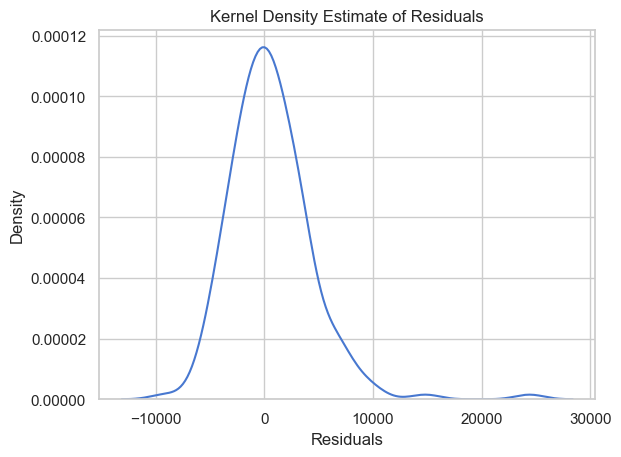

In [230]:
# Plot KDE of residuals
sns.kdeplot(residuals)
plt.xlabel("Residuals")
plt.title("Kernel Density Estimate of Residuals")
plt.show()

In [231]:
from scipy import stats
res_shapiro = stats.shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {res_shapiro.statistic}")
print(f"P-value: {res_shapiro.pvalue}")

alpha = 0.05  # significance level

if res_shapiro.pvalue > alpha:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")
else:
    print("Reject the null hypothesis: Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9109076837835491
P-value: 1.5200911573910867e-09
Reject the null hypothesis: Residuals are not normally distributed.


<h4>Independence of Errors</h4>

In [232]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test on the residuals
dw_statistic = durbin_watson(residuals)

# Print the result
print(f"Durbin-Watson Statistic: {dw_statistic}")

# Interpretation of Durbin-Watson Statistic
if dw_statistic == 2:
    print("No autocorrelation in residuals (independence of errors).")
elif dw_statistic < 2:
    print("Positive autocorrelation in residuals (errors are not independent).")
else:
    print("Negative autocorrelation in residuals (errors are not independent).")


Durbin-Watson Statistic: 2.174948005506086
Negative autocorrelation in residuals (errors are not independent).


<h4>Heteroskedasticity</h4>

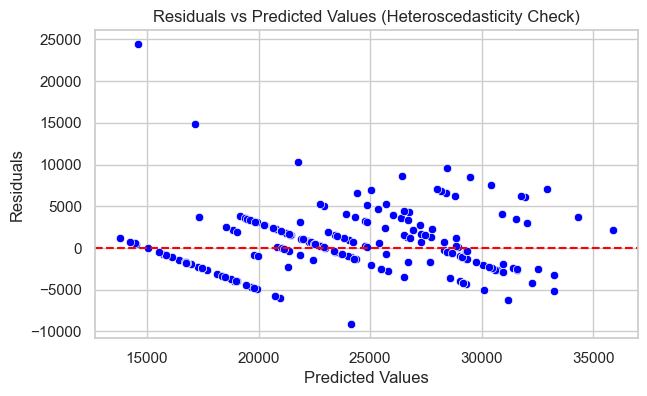

In [233]:
# Plot residuals vs predicted values
plt.figure(figsize=(7, 4))
sns.scatterplot(x=y_test_pred, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Heteroscedasticity Check)")
plt.show()

<h3>Using Statsmodel library</h3>

In [234]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Fit the regression model
x_stat = sm.add_constant(x_train_scaled) 
model_stat = sm.OLS(y_train, x_stat).fit()

# Perform Goldfeld-Quandt test
gq_statistic, p_value, _ = het_goldfeldquandt(model_stat.resid, model_stat.model.exog)

print(f"Goldfeld-Quandt Test Statistic: {gq_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Evidence of heteroscedasticity.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")

Goldfeld-Quandt Test Statistic: 1.3364390962502553
P-value: 0.0022934733139495455
Reject the null hypothesis: Evidence of heteroscedasticity.


<h3>Decision Tree Regressor</h3>

In [235]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train) # Since Decision Trees do not require feature scaling, using non-scaled x for train and test.
y_pred_dt = dt_regressor.predict(x_test)

In [236]:
print("Decision Tree Regressor Model Training Performance -->")
performance_metrics(y_train, dt_regressor.predict(x_train), x_train.shape[1])

Decision Tree Regressor Model Training Performance -->


{'R2': 1.0,
 'Adjusted R2': 1.0,
 'Mean Squared Error': 0.0,
 'Root Mean Squared Error': 0.0,
 'Mean Absolute Percentage Error': 0.0}

In [237]:
print("Decision Tree Regressor Model Test Performance -->")
performance_metrics(y_test, dt_regressor.predict(x_test), x_test.shape[1])

Decision Tree Regressor Model Test Performance -->


{'R2': 0.69,
 'Adjusted R2': 0.68,
 'Mean Squared Error': 11747474.75,
 'Root Mean Squared Error': 3427.46,
 'Mean Absolute Percentage Error': 0.04}

In [238]:
y_test_pred = dt_regressor.predict(x_test)
residuals = y_test - y_test_pred
print("Mean of Residuals : ", residuals.mean())

Mean of Residuals :  -30.303030303030305


<h4>Finding the best hyperparameters</h4>

In [239]:
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree Regressor
dtr_cv = DecisionTreeRegressor(random_state=32)

# Define the parameter grid with hyperparameters
param_grid = {
    'max_depth': [5, 10, 15, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'splitter': ['best', 'random'],  
    'min_impurity_decrease': [0.0, 0.1, 0.2], 
    'max_leaf_nodes': [None, 10, 20, 30],  
}

# Set up GridSearchCV with cross-validation and negative MSE as scoring metric
grid_search = GridSearchCV(estimator=dtr_cv, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Get the best model from the grid search
dt_best = grid_search.best_estimator_


Fitting 5 folds for each of 10752 candidates, totalling 53760 fits
Best parameters found:  {'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 15, 'splitter': 'best'}


In [240]:
print("Tuned Decision Tree Regressor Model Training Performance -->")
performance_metrics(y_train, dt_best.predict(x_train), x_train.shape[1])

Tuned Decision Tree Regressor Model Training Performance -->


{'R2': 0.86,
 'Adjusted R2': 0.86,
 'Mean Squared Error': 5457694.77,
 'Root Mean Squared Error': 2336.17,
 'Mean Absolute Percentage Error': 0.03}

In [241]:
print("Tuned Decision Tree Regressor Model Test Performance -->")
performance_metrics(y_test, dt_best.predict(x_test), x_test.shape[1])

Tuned Decision Tree Regressor Model Test Performance -->


{'R2': 0.78,
 'Adjusted R2': 0.77,
 'Mean Squared Error': 8271926.85,
 'Root Mean Squared Error': 2876.1,
 'Mean Absolute Percentage Error': 0.04}

In [242]:
y_test_pred = dt_best.predict(x_test)
residuals = y_test - y_test_pred
print("Mean of Residuals for Tuned DTR model : ", residuals.mean())

Mean of Residuals for Tuned DTR model :  45.90474016092547


<h3>Random Forest Regressor Model</h3>

In [243]:
from sklearn.ensemble import RandomForestRegressor

randomforestmodel = RandomForestRegressor()
randomforestmodel.fit(x_train, y_train)

RandomForestRegressor()

In [244]:
print("Random Forest Regressor Model Training Performance -->")
performance_metrics(y_train, randomforestmodel.predict(x_train), x_train.shape[1])

Random Forest Regressor Model Training Performance -->


{'R2': 0.97,
 'Adjusted R2': 0.97,
 'Mean Squared Error': 1156847.84,
 'Root Mean Squared Error': 1075.57,
 'Mean Absolute Percentage Error': 0.02}

In [245]:
print("Random Forest Regressor Model Test Performance -->")
performance_metrics(y_test, randomforestmodel.predict(x_test), x_test.shape[1])

Random Forest Regressor Model Test Performance -->


{'R2': 0.78,
 'Adjusted R2': 0.77,
 'Mean Squared Error': 8477454.55,
 'Root Mean Squared Error': 2911.61,
 'Mean Absolute Percentage Error': 0.04}

In [ ]:
rf_cv = RandomForestRegressor(random_state=32)

# Define the parameter grid to include hyperparameters
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150],
    'max_depth': [3, 5, 10, 15, 20],
    'max_leaf_nodes': [20, 40, 60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_jobs': [-1]  # Parallelize the process across all cores
}

# Set up GridSearchCV with cross-validation and negative MSE as scoring metric
grid_search = GridSearchCV(estimator=rf_cv, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 675 candidates, totalling 3375 fits


In [145]:
print("Tuned Random Forest Regressor Model Training Performance -->")
performance_metrics(y_train, best_rf_model.predict(x_train), x_train.shape[1])

Tuned Random Forest Regressor Model Training Performance -->


{'R2': 0.89,
 'Adjusted R2': 0.89,
 'Mean Squared Error': 4341570.84,
 'Root Mean Squared Error': 2083.64,
 'Mean Absolute Percentage Error': 0.03}

In [146]:
print("Tuned Random Forest Regressor Model Test Performance -->")
performance_metrics(y_test, best_rf_model.predict(x_test), x_test.shape[1])

Tuned Random Forest Regressor Model Test Performance -->


{'R2': 0.81,
 'Adjusted R2': 0.8,
 'Mean Squared Error': 7181952.68,
 'Root Mean Squared Error': 2679.92,
 'Mean Absolute Percentage Error': 0.04}

<h3>Gradient Boosting Regressor</h3>

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
gbr_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],             
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     
    'max_depth': [3, 5, 7],                      
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],               
    'subsample': [0.8, 0.9, 1.0]                 
}
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

gbr_best = grid_search.best_estimator_

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}


In [150]:
print("Tuned Gradient Boosting Regressor Model Training Performance -->")
performance_metrics(y_train, gbr_best.predict(x_train), x_train.shape[1])

Tuned Gradient Boosting Regressor Model Training Performance -->


{'R2': 0.94,
 'Adjusted R2': 0.94,
 'Mean Squared Error': 2207915.33,
 'Root Mean Squared Error': 1485.91,
 'Mean Absolute Percentage Error': 0.03}

In [151]:
print("Tuned Gradient Boosting Regressor Model Test Performance -->")
performance_metrics(y_test, gbr_best.predict(x_test), x_test.shape[1])

Tuned Gradient Boosting Regressor Model Test Performance -->


{'R2': 0.81,
 'Adjusted R2': 0.8,
 'Mean Squared Error': 7286226.25,
 'Root Mean Squared Error': 2699.3,
 'Mean Absolute Percentage Error': 0.05}

<h3>Feature Importances of different models</h3>

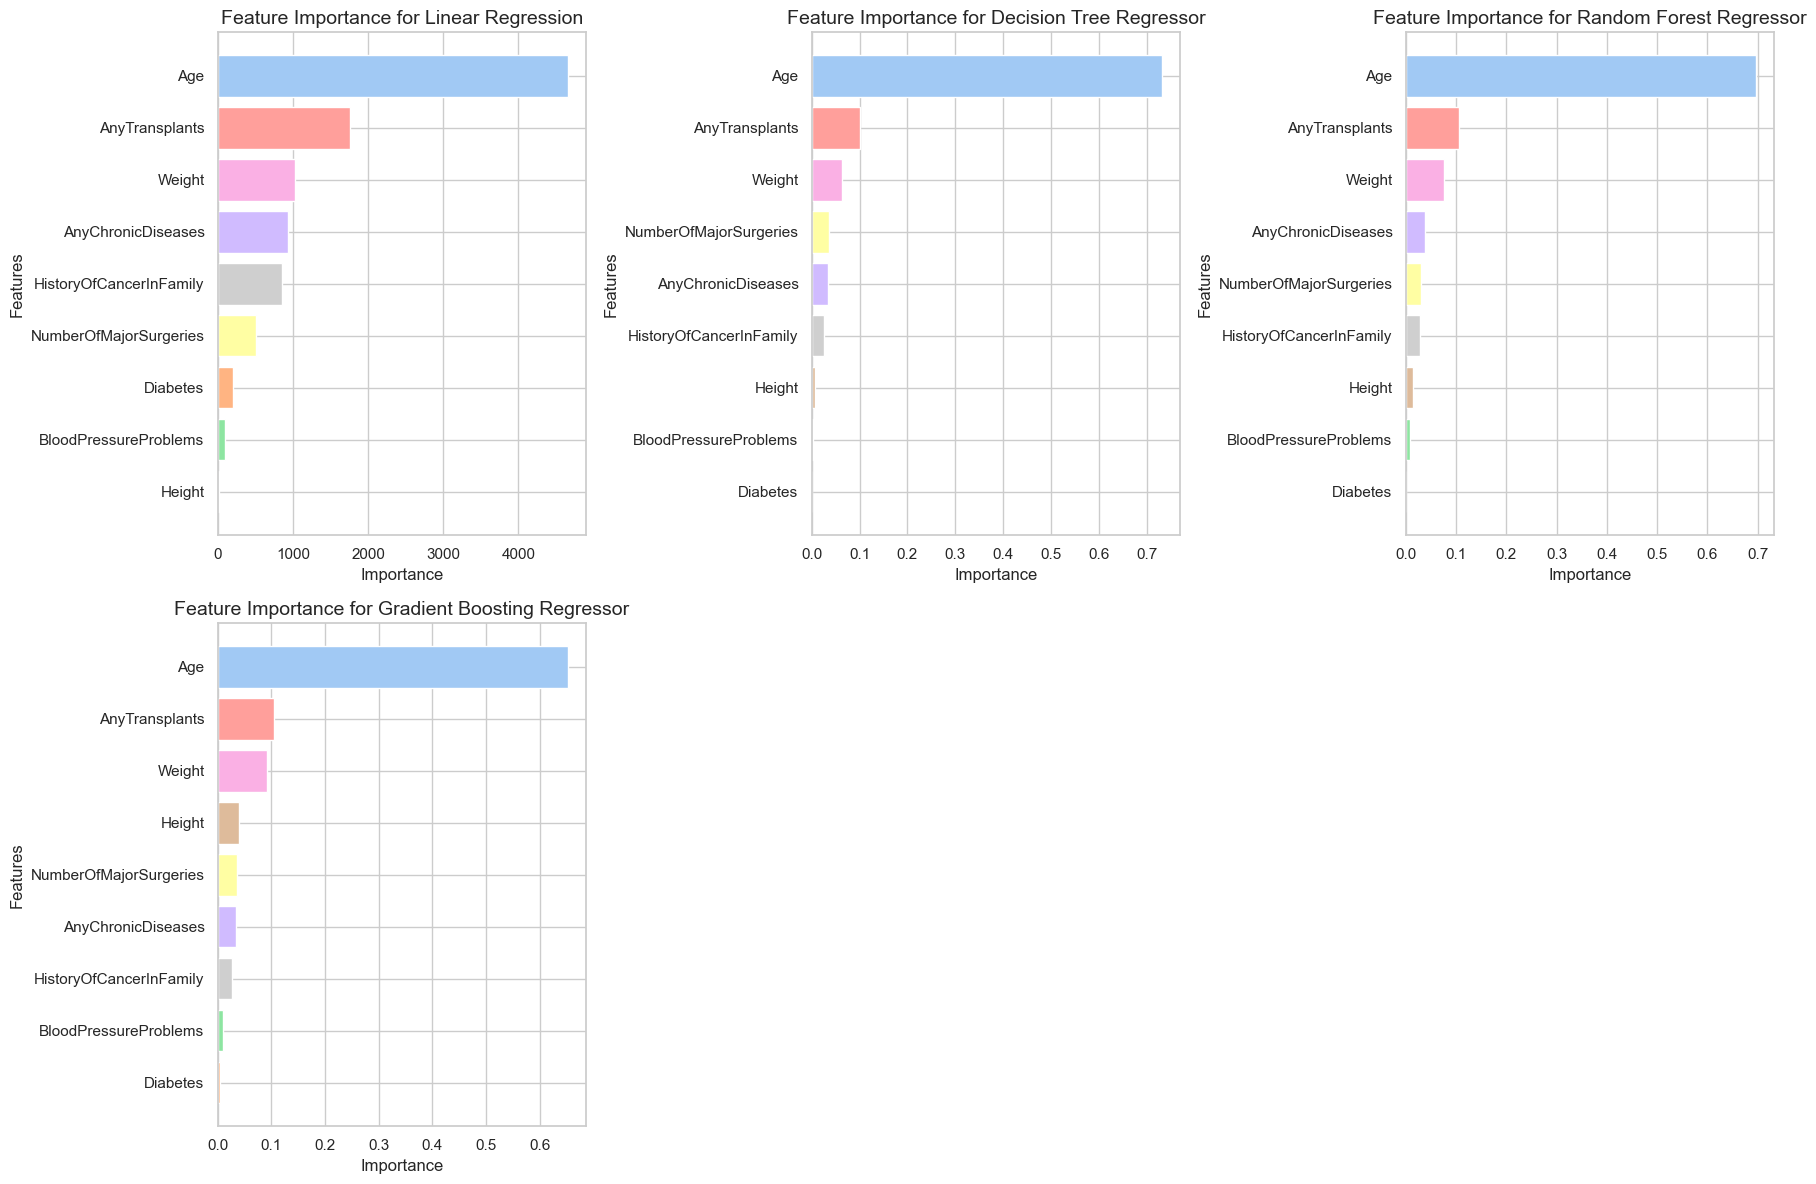

In [162]:
model_name = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"]
model_object = [lrmodel, dt_best, best_rf_model, gbr_best]

# Check if the features are named (DataFrame) or just index-based (numpy array)
features = x_train.columns if hasattr(x_train, 'columns') else [f'Feature {i}' for i in range(x_train.shape[1])]

# Set a consistent color palette
colors = sns.color_palette("pastel", len(features))

# Determine the number of rows and columns based on the number of models
num_models = len(model_object)
rows = (num_models // 3) + (num_models % 3 > 0)
cols = min(num_models, 3)

# Create subplots dynamically
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))
axes = axes.flatten()

def get_importances(model, features):
    """ Helper function to retrieve feature importances or coefficients """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        importances = np.zeros(len(features))  # Default case if no importances/coefficients are found
    return importances

# Loop through models and plot their feature importances
for i, (name, model) in enumerate(zip(model_name, model_object)):
    ax = axes[i]
    importances = get_importances(model, features)
    
    # Sort by importance
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = np.array(features)[sorted_idx]
    sorted_importances = importances[sorted_idx]
    
    # Plotting
    ax.barh(sorted_features, sorted_importances, color=[colors[j] for j in sorted_idx])
    ax.set_title(f"Feature Importance for {name}", fontsize=14)
    ax.set_xlabel("Importance", fontsize=12)
    ax.set_ylabel("Features", fontsize=12)
    ax.invert_yaxis()  # Reverse the y-axis for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Tight layout for neat spacing
plt.tight_layout()
plt.show()